In [17]:
from utils.data_reading import *
import matplotlib.pyplot as plt
import numpy as np

lidar_data=read_lidar_data("./lidar_data/13/RCS_1306_015122.xlsx")

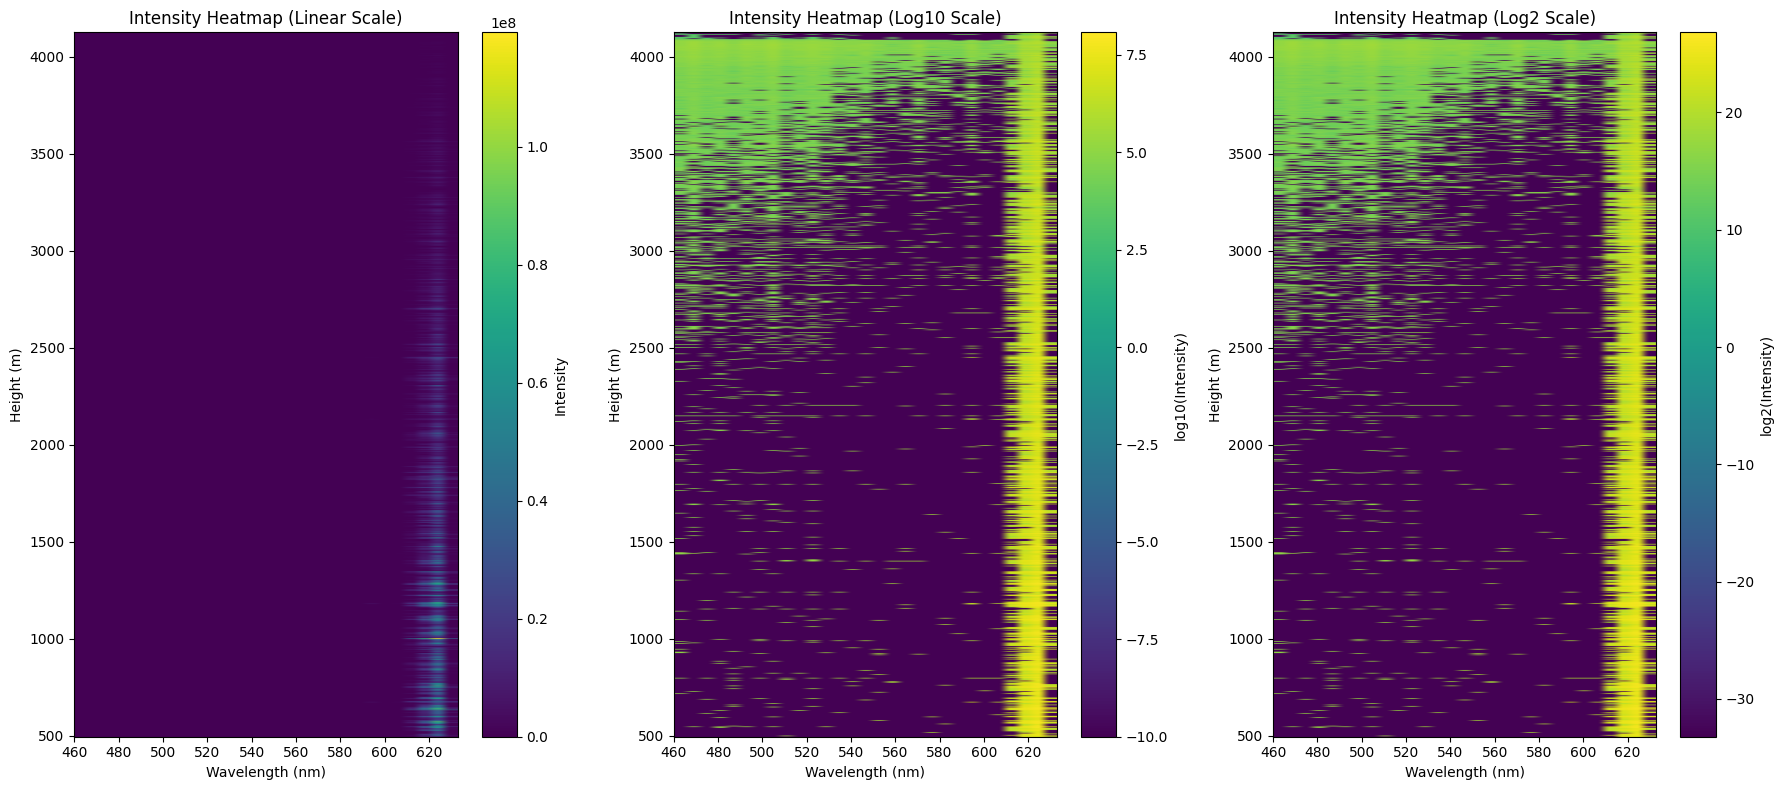

In [18]:
# 2. Heatmap showing intensity vs height and wavelength
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 8))

# Linear scale heatmap
im1 = ax1.imshow(lidar_data.values, aspect='auto', cmap='viridis', 
                 extent=[lidar_data.columns.min(), lidar_data.columns.max(), lidar_data.index.min(), lidar_data.index.max()])
ax1.set_xlabel('Wavelength (nm)')
ax1.set_ylabel('Height (m)')
ax1.set_title('Intensity Heatmap (Linear Scale)')
plt.colorbar(im1, ax=ax1, label='Intensity')

# Log scale heatmap (add small value to avoid log(0))
log_data = np.log10(lidar_data.values + 1e-10)
im2 = ax2.imshow(log_data, aspect='auto', cmap='viridis',
                 extent=[lidar_data.columns.min(), lidar_data.columns.max(), lidar_data.index.min(), lidar_data.index.max()])
ax2.set_xlabel('Wavelength (nm)')
ax2.set_ylabel('Height (m)')
ax2.set_title('Intensity Heatmap (Log10 Scale)')
plt.colorbar(im2, ax=ax2, label='log10(Intensity)')

log_data = np.log2(lidar_data.values + 1e-10)
im3 = ax3.imshow(log_data, aspect='auto', cmap='viridis',
                 extent=[lidar_data.columns.min(), lidar_data.columns.max(), lidar_data.index.min(), lidar_data.index.max()])
ax3.set_xlabel('Wavelength (nm)')
ax3.set_ylabel('Height (m)')
ax3.set_title('Intensity Heatmap (Log2 Scale)')
plt.colorbar(im3, ax=ax3, label='log2(Intensity)')

plt.tight_layout()
plt.show()